# Name - Parshant Ratawal
# GRIP : The Sparks Foundation
# Data Science And Business Analytics
# Task 1 : Prediction using Simple Linear Regression (Supervised Learning)
From the given dataset we have to predict the percentage score of the student based on number of hours studied. Here the only feature is the number of hours studied and the target variable is percentage scored. The predictions can be made with the help of Simple Linear Regression Algorithm.

# Step 1) Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
#importing the data
data = pd.read_excel("GRIP Task 1 LR.xlsx")

In [3]:
data.sample(10)

,Hours,Scores
13,3.3,42.0
12,4.5,41.0
21,4.8,54.0
4,3.5,30.0
6,9.2,88.0
1,5.1,47.0
7,5.5,60.0
14,1.1,17.0
3,8.5,75.0
23,6.9,76.0


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,47.924000
std,2.525094,27.827074
min,1.100000,2.700000
25%,2.700000,25.000000
50%,4.800000,42.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [7]:
#checking for null values in the dataset if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2) Visualization of the Dataset

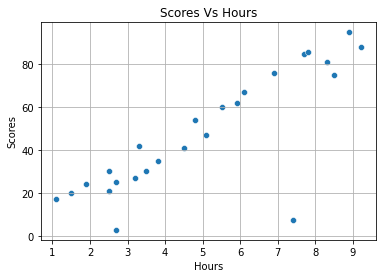

<Figure size 1080x288 with 0 Axes>

In [8]:
sns.scatterplot(x = data['Hours'],y = data['Scores'])
plt.title('Scores Vs Hours')
plt.grid()
plt.figure(figsize = (15,4))
plt.show()

Figure size 1080x288 with 0 Axes>
From the above Scores vs Hours graph we can clearly observe that there is positive linear relation between the variables.As the number of hours increase the percentage is also increased.

# Step 3) Data Preparation
In this step we will divide the data into attributes(inputs) and labels(outputs)

In [9]:
# defining the Dependent and independent variable from the dataset
X =data.iloc[:,:1].values
y =data.iloc[:,1:].values

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([[21. ],
       [47. ],
       [27. ],
       [75. ],
       [30. ],
       [20. ],
       [88. ],
       [60. ],
       [81. ],
       [25. ],
       [85. ],
       [62. ],
       [41. ],
       [42. ],
       [17. ],
       [95. ],
       [30. ],
       [24. ],
       [67. ],
       [ 7.4],
       [ 2.7],
       [54. ],
       [35. ],
       [76. ],
       [86. ]])

In [12]:
#Splitting the data into training and testing data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

# Step 4) Training The Algorithm

In [13]:
#importing Linear regression model from sklearn and fitting the training data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

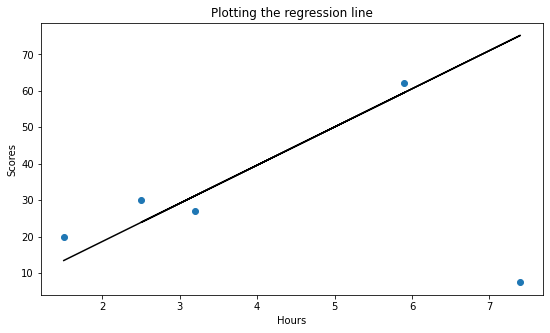

In [14]:
# Plotting the regression line
regressionline = lr.coef_*X_test+lr.intercept_

# Plotting for the test data
plt.figure(figsize=[9,5])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(X_test, y_test)
plt.plot(X_test, regressionline,color = 'black')
plt.title('Plotting the regression line')
plt.show()

# Step 5) Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
# Predicting the Scores of the test data in hours
y_pred = lr.predict(X_test)
X_test,y_pred

(array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9]]),
 array([[13.42038877],
        [31.22248479],
        [75.20413376],
        [23.89220996],
        [59.49640198]]))

In [16]:
# You can also test with our own data
hours = 9.25
prediction = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = [94.57700295]


No of Hours = 9.25
Predicted Score = [93.69173249]
# Step 6) Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here, we have chosen the mean square error.

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
print("The Mean Squared Error is:",mean_absolute_error(y_test,y_pred))

The Mean Squared Error is: 17.443523565971777
